#Exploratory Data Analysis on Global Terrorism

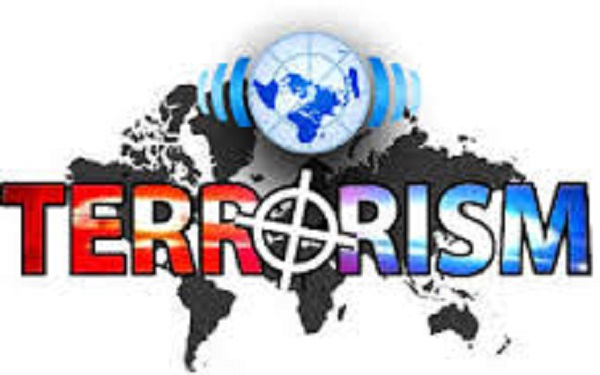

#Importing Libraries

In [138]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import os
import mpl_toolkits
import json
import missingno as msno

#Reading and Exploring data

In [56]:
# Storing Data in DataFrame
df_terrorism= pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding='ISO-8859-1')

In [57]:
#Dimensions of the DataFrame
df_terrorism.shape

(181691, 135)

#Cleaning DataFrame

In [58]:
# Selecting Wanted columns
usecols = [1, 5, 8, 10, 11, 12, 13, 14, 25, 26, 27, 29, 35, 58, 69, 71, 82, 98, 100, 101, 103, 104, 106]
renamecols = {
    'latitude': 'lat',
    'longitude': 'lon',
    'iyear': u'year',
    'country_txt': u'country',
    'region_txt': u'region',
    'provstate': u'state',
    'attacktype1_txt': u'attacktype',
    'targtype1_txt': u'targettype',
    'weaptype1_txt': u'weapontype',
    'nperps': u'nter',
    'nkill': u'nkilled',
    'nkillter': u'nkilledter',
    'nwound': u'nwounded',
    'nwoundte': u'nwoundedter',
    'propextent_txt': u'propertyextent'
}

In [59]:
df_terrorism= pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding='ISO-8859-1',usecols=usecols)
df_terrorism.rename(columns=renamecols, inplace=True)
df_terrorism = df_terrorism.apply(lambda x: x.encode('utf-8').strip() if isinstance(x, str) else x)

In [60]:
df_terrorism.shape

(181691, 23)

In [61]:
df_terrorism.head()

,year,extended,country,region,state,city,lat,lon,multiple,success,...,gname,nter,claimed,weapontype,nkilled,nkilledter,nwounded,nwoundedter,property,propertyextent
0,1970,0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,0.0,1,...,MANO-D,NaN,NaN,Unknown,1.0,NaN,0.0,NaN,0,NaN
1,1970,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,0.0,1,...,23rd of September Communist League,7.0,NaN,Unknown,0.0,NaN,0.0,NaN,0,NaN
2,1970,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,0.0,1,...,Unknown,NaN,NaN,Unknown,1.0,NaN,0.0,NaN,0,NaN
3,1970,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,0.0,1,...,Unknown,NaN,NaN,Explosives,NaN,NaN,NaN,NaN,1,NaN
4,1970,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,0.0,1,...,Unknown,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,1,NaN


In [62]:
#Removing unknown values in the coordinates
df_terrorism = df_terrorism[pd.notnull(df_terrorism.lat)]
df_terrorism = df_terrorism[pd.notnull(df_terrorism.lon)]
print("Unknown values in the coordinates are removed succcessfully")

Unknown values in the coordinates are removed succcessfully


In [63]:
# Unknowns in numeric columns
exclude_cols = ['year', 'lat', 'lon']
float_cols = [c for c in df_terrorism.select_dtypes(include=[float]).columns.tolist() if c not in exclude_cols]

In [64]:
df_terrorism[float_cols] = df_terrorism[float_cols].fillna(0).astype(int)
df_terrorism[float_cols] = df_terrorism[float_cols].mask(df_terrorism[float_cols] < 0, 0)

In [65]:
# Unknowns in string columns
str_cols = df_terrorism.select_dtypes(exclude=[float]).columns.tolist()
df_terrorism[str_cols] = df_terrorism[str_cols].fillna('Unknown')
# Many fields are dots which mean unknown value
df_terrorism[str_cols] = df_terrorism[str_cols].replace(r'^\.*$', 'Unknown', regex=True)

In [66]:
# Limit Long strings
df_terrorism['weapontype'] = df_terrorism['weapontype'].replace(u'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)', 'Vehicle')
df_terrorism['propertyextent'] = df_terrorism['propertyextent'].replace(u'Minor (likely < $1 million)', u'Minor (< $1 million)')
df_terrorism['propertyextent'] = df_terrorism['propertyextent'].replace(u'Major (likely > $1 million but < $1 billion)', u'Major (< $1 billion)')
df_terrorism['propertyextent'] = df_terrorism['propertyextent'].replace(u'Catastrophic (likely > $1 billion)', u'Catastrophic (> $1 billion)')

In [67]:
# Number of duplicates values
df_terrorism.duplicated().sum()

22037

In [68]:
# Removal of duplicates values
df_terrorism.drop_duplicates(keep=False,inplace=True)

In [69]:
# No more null values
df_terrorism.isnull().sum()

year              0
extended          0
country           0
region            0
state             0
city              0
lat               0
lon               0
multiple          0
success           0
suicide           0
attacktype        0
targettype        0
gname             0
nter              0
claimed           0
weapontype        0
nkilled           0
nkilledter        0
nwounded          0
nwoundedter       0
property          0
propertyextent    0
dtype: int64

In [70]:
print("Total Number of Null Values = ", df_terrorism.isnull().sum().sum())

Total Number of Null Values =  0


In [71]:
#Shape of Processed dataset
df_terrorism

,year,extended,country,region,state,city,lat,lon,multiple,success,...,gname,nter,claimed,weapontype,nkilled,nkilledter,nwounded,nwoundedter,property,propertyextent
0,1970,0,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,18.456792,-69.951164,0,1,...,MANO-D,0,0,Unknown,1,0,0,0,0,Unknown
1,1970,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,0,1,...,23rd of September Communist League,7,0,Unknown,0,0,0,0,0,Unknown
2,1970,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,0,1,...,Unknown,0,0,Unknown,1,0,0,0,0,Unknown
3,1970,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,0,1,...,Unknown,0,0,Explosives,0,0,0,0,1,Unknown
4,1970,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,0,1,...,Unknown,0,0,Incendiary,0,0,0,0,1,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,0,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,0,1,...,Al-Shabaab,0,1,Firearms,1,0,2,0,-9,Unknown
181687,2017,0,Syria,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,0,1,...,Muslim extremists,0,0,Explosives,2,0,7,0,1,Unknown
181688,2017,0,Philippines,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,0,1,...,Bangsamoro Islamic Freedom Movement (BIFM),0,0,Incendiary,0,0,0,0,1,Unknown
181689,2017,0,India,South Asia,Manipur,Imphal,24.798346,93.940430,0,0,...,Unknown,0,0,Explosives,0,0,0,0,-9,Unknown


In [72]:
df_terrorism.shape

(145751, 23)

#Exploratory Data Analysis

In [73]:
#Columns in the dataset
df_terrorism.columns

Index(['year', 'extended', 'country', 'region', 'state', 'city', 'lat', 'lon',
       'multiple', 'success', 'suicide', 'attacktype', 'targettype', 'gname',
       'nter', 'claimed', 'weapontype', 'nkilled', 'nkilledter', 'nwounded',
       'nwoundedter', 'property', 'propertyextent'],
      dtype='object')

In [74]:
#Datatypes in the DataFrame
df_terrorism.dtypes

year                int64
extended            int64
country            object
region             object
state              object
city               object
lat               float64
lon               float64
multiple            int64
success             int64
suicide             int64
attacktype         object
targettype         object
gname              object
nter                int64
claimed             int64
weapontype         object
nkilled             int64
nkilledter          int64
nwounded            int64
nwoundedter         int64
property            int64
propertyextent     object
dtype: object

In [75]:
df_terrorism.head()

,year,extended,country,region,state,city,lat,lon,multiple,success,...,gname,nter,claimed,weapontype,nkilled,nkilledter,nwounded,nwoundedter,property,propertyextent
0,1970,0,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,18.456792,-69.951164,0,1,...,MANO-D,0,0,Unknown,1,0,0,0,0,Unknown
1,1970,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,0,1,...,23rd of September Communist League,7,0,Unknown,0,0,0,0,0,Unknown
2,1970,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,0,1,...,Unknown,0,0,Unknown,1,0,0,0,0,Unknown
3,1970,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,0,1,...,Unknown,0,0,Explosives,0,0,0,0,1,Unknown
4,1970,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,0,1,...,Unknown,0,0,Incendiary,0,0,0,0,1,Unknown


In [76]:
df_terrorism.tail()

,year,extended,country,region,state,city,lat,lon,multiple,success,...,gname,nter,claimed,weapontype,nkilled,nkilledter,nwounded,nwoundedter,property,propertyextent
181686,2017,0,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,0,1,...,Al-Shabaab,0,1,Firearms,1,0,2,0,-9,Unknown
181687,2017,0,Syria,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,0,1,...,Muslim extremists,0,0,Explosives,2,0,7,0,1,Unknown
181688,2017,0,Philippines,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,0,1,...,Bangsamoro Islamic Freedom Movement (BIFM),0,0,Incendiary,0,0,0,0,1,Unknown
181689,2017,0,India,South Asia,Manipur,Imphal,24.798346,93.940430,0,0,...,Unknown,0,0,Explosives,0,0,0,0,-9,Unknown
181690,2017,0,Philippines,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,0,0,...,Unknown,0,0,Explosives,0,0,0,0,0,Unknown


In [77]:
#Summary of Dataset
df_terrorism.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145751 entries, 0 to 181690
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            145751 non-null  int64  
 1   extended        145751 non-null  int64  
 2   country         145751 non-null  object 
 3   region          145751 non-null  object 
 4   state           145751 non-null  object 
 5   city            145751 non-null  object 
 6   lat             145751 non-null  float64
 7   lon             145751 non-null  float64
 8   multiple        145751 non-null  int64  
 9   success         145751 non-null  int64  
 10  suicide         145751 non-null  int64  
 11  attacktype      145751 non-null  object 
 12  targettype      145751 non-null  object 
 13  gname           145751 non-null  object 
 14  nter            145751 non-null  int64  
 15  claimed         145751 non-null  int64  
 16  weapontype      145751 non-null  object 
 17  nkilled   

In [78]:
#Count of Values in each columns of DataFrame
df_terrorism.nunique()

year                 47
extended              2
country             204
region               12
state              2822
city              34797
lat               47862
lon               47578
multiple              2
success               2
suicide               2
attacktype            9
targettype           22
gname              3397
nter                107
claimed               2
weapontype           12
nkilled             201
nkilledter           96
nwounded            237
nwoundedter          44
property              3
propertyextent        4
dtype: int64

In [79]:
#Years in the DataFrame
df_terrorism["year"].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017])

In [80]:
# Count of each year in the Data Frame
df_terrorism["year"].value_counts()

2014    14254
2015    12422
2016    11046
2013    10419
2017     9649
2012     7596
2008     4274
2011     4155
2009     4105
2010     4076
1992     3736
1991     3229
1989     3148
2007     2889
1988     2779
1994     2622
1990     2568
2006     2491
1997     2262
1984     2198
1996     2141
1987     2073
1983     2061
1995     1991
1980     1946
1981     1940
1986     1891
1979     1890
2005     1887
1982     1874
1985     1853
2001     1782
2000     1636
2002     1244
1999     1239
1978     1190
2003     1184
2004     1104
1977      935
1998      824
1976      671
1975      545
1970      514
1974      414
1971      361
1973      346
1972      297
Name: year, dtype: int64

In [81]:
# Total count of the regions in the Data Frame
df_terrorism['region'].value_counts()

South Asia                     39932
Middle East & North Africa     39116
Sub-Saharan Africa             15315
South America                  12720
Western Europe                 12098
Southeast Asia                 10957
Central America & Caribbean     6822
Eastern Europe                  4579
North America                   2832
East Asia                        627
Central Asia                     496
Australasia & Oceania            257
Name: region, dtype: int64

In [82]:
# Total count of gname in the DataFrame
df_terrorism['gname'].value_counts()

Unknown                                        65768
Taliban                                         7130
Islamic State of Iraq and the Levant (ISIL)     4636
Al-Shabaab                                      2852
Shining Path (SL)                               2677
                                               ...  
Banyamulenge rebels                                1
Christian Palestinian group                        1
Anti-Christian extremists                          1
Anti-Apartheid guerrillas                          1
MANO-D                                             1
Name: gname, Length: 3397, dtype: int64

In [83]:
# Total count of cities in the DataFrame
df_terrorism['city'].value_counts()

Unknown            6088
Baghdad            3967
Karachi            1491
Mosul              1433
Mogadishu          1211
                   ... 
Essai                 1
Ban Ton Phai          1
Chandanigahapur       1
Jotapuquio            1
Kubentog              1
Name: city, Length: 34797, dtype: int64

In [84]:
# Total count of Attack type in the DataFrame
df_terrorism['attacktype'].value_counts()

Bombing/Explosion                      66473
Armed Assault                          36659
Assassination                          16286
Hostage Taking (Kidnapping)             9953
Facility/Infrastructure Attack          7811
Unknown                                 6281
Unarmed Assault                          844
Hostage Taking (Barricade Incident)      838
Hijacking                                606
Name: attacktype, dtype: int64

In [85]:
# Total count of Target type in the DataFrame
df_terrorism['targettype'].value_counts()

Private Citizens & Property       34444
Military                          24366
Police                            21508
Government (General)              17355
Business                          14350
Transportation                     5270
Unknown                            4087
Religious Figures/Institutions     3863
Educational Institution            3479
Government (Diplomatic)            3084
Utilities                          2828
Terrorists/Non-State Militia       2771
Journalists & Media                2517
Violent Political Party            1644
Airports & Aircraft                1207
NGO                                 906
Telecommunication                   804
Tourists                            395
Maritime                            284
Food or Water Supply                264
Abortion Related                    203
Other                               122
Name: targettype, dtype: int64

In [86]:
# Stastical summary of Data
df_terrorism.describe()

,year,extended,lat,lon,multiple,success,suicide,nter,claimed,nkilled,nkilledter,nwounded,nwoundedter,property
count,145751.000000,145751.000000,145751.000000,1.457510e+05,145751.000000,145751.000000,145751.000000,145751.000000,145751.000000,145751.000000,145751.000000,145751.000000,145751.000000,145751.000000
mean,2003.696846,0.050717,23.737317,-5.594836e+02,0.087306,0.885668,0.043828,3.487187,0.118277,2.596339,0.386097,3.336485,0.080638,-0.595577
std,12.881297,0.219419,17.816167,2.257515e+05,0.282285,0.318215,0.204713,95.413777,0.322937,12.242903,3.708930,38.221146,1.304178,3.144615
min,1970.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000
25%,1992.000000,0.000000,11.500433,9.109324e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2010.000000,0.000000,31.326015,4.378420e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2014.000000,0.000000,34.621521,6.988188e+01,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,1.000000
max,2017.000000,1.000000,74.633553,1.793667e+02,1.000000,1.000000,1.000000,25000.000000,1.000000,1570.000000,500.000000,8191.000000,200.000000,1.000000


In [87]:
# Data in each columns
for col in df_terrorism:
  print(df_terrorism[col].unique())

[1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1986 1982
 1983 1984 1985 1987 1988 1989 1990 1991 1992 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017]
[0 1]
['Dominican Republic' 'Mexico' 'Philippines' 'Greece' 'Japan' 'Uruguay'
 'United States' 'Italy' 'East Germany (GDR)' 'Guatemala' 'Venezuela'
 'West Germany (FRG)' 'Switzerland' 'Jordan' 'Brazil' 'Egypt' 'Argentina'
 'Lebanon' 'Ireland' 'Turkey' 'Paraguay' 'Iran' 'United Kingdom'
 'Colombia' 'Nicaragua' 'Spain' 'Netherlands' 'Belgium' 'Canada'
 'Australia' 'Pakistan' 'Ethiopia' 'Sweden' 'Costa Rica' 'Bolivia'
 'South Yemen' 'Cambodia' 'Israel' 'Poland' 'Taiwan' 'Panama'
 'West Bank and Gaza Strip' 'Austria' 'India' 'France' 'South Vietnam'
 "People's Republic of the Congo" 'Portugal' 'Algeria' 'El Salvador'
 'Thailand' 'Haiti' 'Sudan' 'Morocco' 'Cyprus' 'Afghanistan' 'Chile'
 'Honduras' 'Yugoslavia' 'Ecuador' 'New Zealand' 'Zambia' 'Zaire'
 'Ma

In [88]:
# Correlation among the columns
df_terrorism.corr()

,year,extended,lat,lon,multiple,success,suicide,nter,claimed,nkilled,nkilledter,nwounded,nwoundedter,property
year,1.000000,0.085612,0.136563,0.004544,0.192339,-0.055631,0.137294,-0.007671,0.243189,0.014110,0.073636,0.010954,0.048672,-0.246113
extended,0.085612,1.000000,-0.031840,0.000612,0.003282,0.079313,-0.041849,0.007095,0.043446,0.011508,0.009080,-0.011784,0.003906,0.001298
lat,0.136563,-0.031840,1.000000,0.001682,0.016141,-0.060114,0.074880,-0.014746,0.082393,-0.018872,0.013885,0.015433,0.024218,-0.065646
lon,0.004544,0.000612,0.001682,1.000000,0.000830,-0.000949,0.000575,0.000096,0.000987,-0.000516,0.000280,0.000232,0.000170,-0.001365
multiple,0.192339,0.003282,0.016141,0.000830,1.000000,0.012211,0.063198,0.005011,0.153533,0.028861,0.033395,0.025729,0.017498,-0.079327
success,-0.055631,0.079313,-0.060114,-0.000949,0.012211,1.000000,-0.028716,0.007494,0.030042,0.052950,-0.021452,0.024677,-0.014305,-0.037654
suicide,0.137294,-0.041849,0.074880,0.000575,0.063198,-0.028716,1.000000,-0.001857,0.176893,0.133679,0.100644,0.094466,0.004983,-0.074377
nter,-0.007671,0.007095,-0.014746,0.000096,0.005011,0.007494,-0.001857,1.000000,0.003209,0.021924,0.023334,0.010891,0.013930,0.004812
claimed,0.243189,0.043446,0.082393,0.000987,0.153533,0.030042,0.176893,0.003209,1.000000,0.063533,0.077332,0.035727,0.058204,-0.076182
nkilled,0.014110,0.011508,-0.018872,-0.000516,0.028861,0.052950,0.133679,0.021924,0.063533,1.000000,0.351417,0.449827,0.110684,-0.014859


In [89]:
# Covariance between set of variables
df_terrorism.cov()

,year,extended,lat,lon,multiple,success,suicide,nter,claimed,nkilled,nkilledter,nwounded,nwoundedter,property
year,165.927809,0.241975,31.340539,1.321251e+04,0.699380,-0.228033,0.362041,-9.427709,1.011630,2.225141,3.518001,5.393143,0.817667,-9.969225
extended,0.241975,0.048145,-0.124470,3.029411e+01,0.000203,0.005538,-0.001880,0.148533,0.003079,0.030915,0.007389,-0.098822,0.001118,0.000895
lat,31.340539,-0.124470,317.415823,6.766963e+03,0.081175,-0.340808,0.273103,-25.067462,0.474048,-4.116284,0.917487,10.509426,0.562711,-3.677794
lon,13212.510485,30.294111,6766.962958,5.096373e+10,52.893273,-68.185725,26.594830,2064.466116,71.991464,-1426.390090,234.255259,2002.901375,49.962750,-969.307305
multiple,0.699380,0.000203,0.081175,5.289327e+01,0.079685,0.001097,0.003652,0.134961,0.013996,0.099743,0.034963,0.277600,0.006442,-0.070417
success,-0.228033,0.005538,-0.340808,-6.818572e+01,0.001097,0.101261,-0.001871,0.227537,0.003087,0.206287,-0.025318,0.300138,-0.005937,-0.037679
suicide,0.362041,-0.001880,0.273103,2.659483e+01,0.003652,-0.001871,0.041908,-0.036275,0.011694,0.335037,0.076416,0.739139,0.001330,-0.047880
nter,-9.427709,0.148533,-25.067462,2.064466e+03,0.134961,0.227537,-0.036275,9103.788774,0.098877,25.610066,8.257386,39.716102,1.733393,1.443751
claimed,1.011630,0.003079,0.474048,7.199146e+01,0.013996,0.003087,0.011694,0.098877,0.104288,0.251188,0.092625,0.440977,0.024514,-0.077364
nkilled,2.225141,0.030915,-4.116284,-1.426390e+03,0.099743,0.206287,0.335037,25.610066,0.251188,149.888679,15.957164,210.491106,1.767281,-0.572063


In [90]:
# Slicing Data
df_terrorism.iloc[0]

year                                     1970
extended                                    0
country                    Dominican Republic
region            Central America & Caribbean
state                                 Unknown
city                            Santo Domingo
lat                                 18.456792
lon                                -69.951164
multiple                                    0
success                                     1
suicide                                     0
attacktype                      Assassination
targettype        Private Citizens & Property
gname                                  MANO-D
nter                                        0
claimed                                     0
weapontype                            Unknown
nkilled                                     1
nkilledter                                  0
nwounded                                    0
nwoundedter                                 0
property                          

In [91]:
df_terrorism.iloc[:,0]

0         1970
1         1970
2         1970
3         1970
4         1970
          ... 
181686    2017
181687    2017
181688    2017
181689    2017
181690    2017
Name: year, Length: 145751, dtype: int64

# Visualization of Data

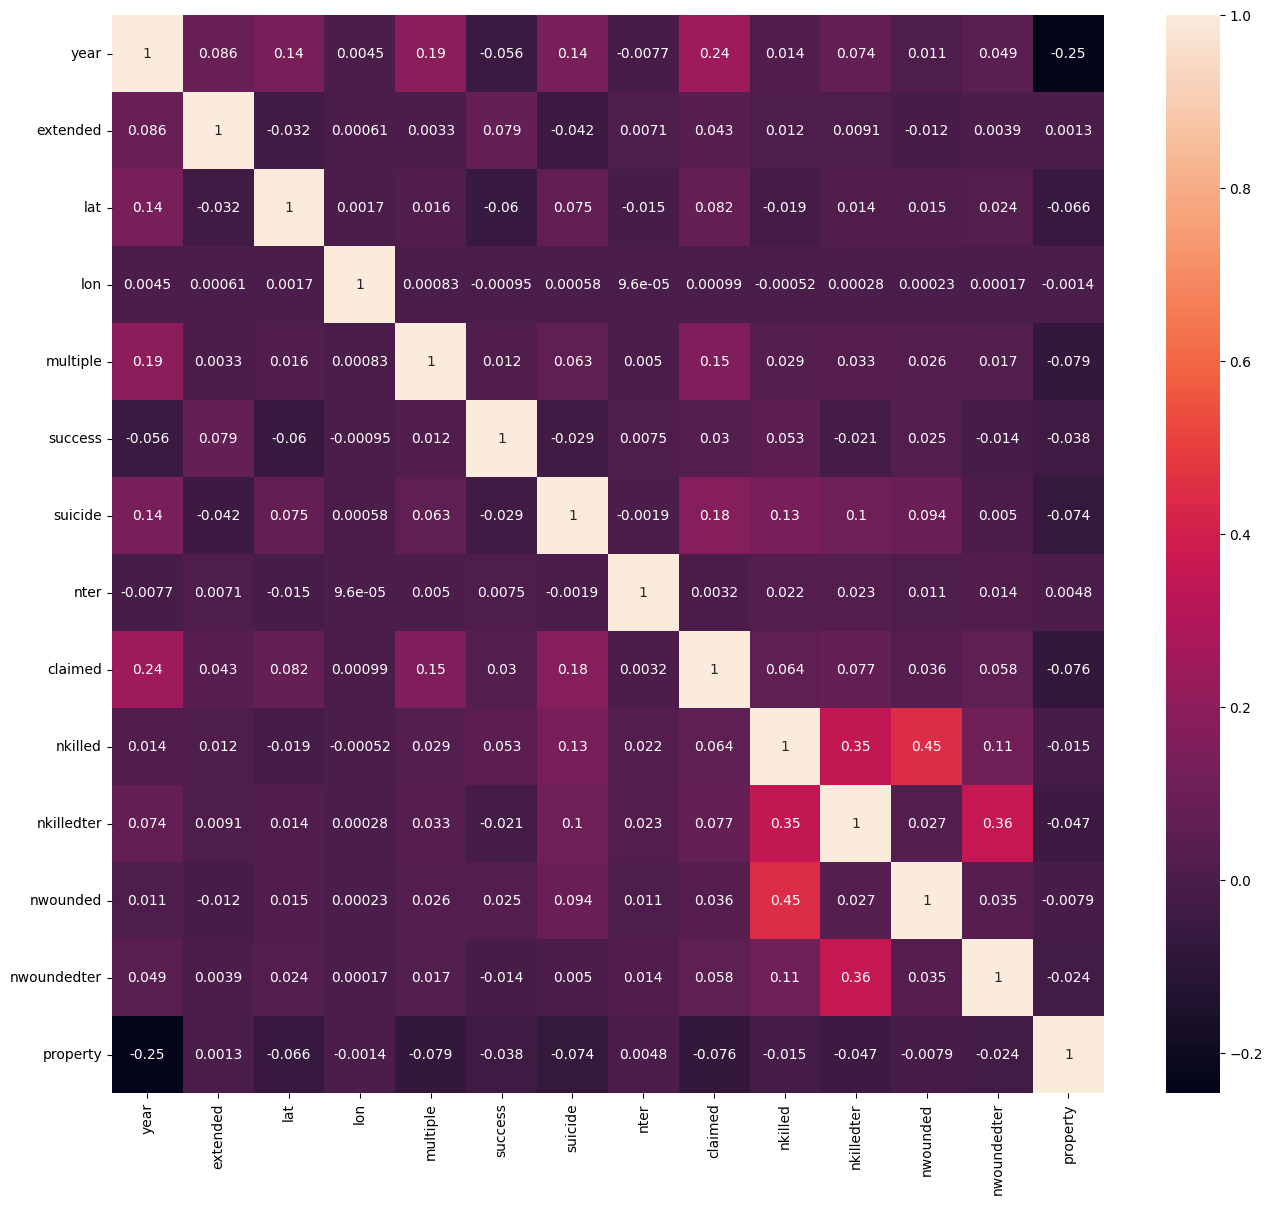

In [92]:
# Heat Map of the correlation among the columns
fig,axes = plt.subplots(1,1,figsize=(16,14))
sns.heatmap(df_terrorism.corr(), annot = True)
plt.show()

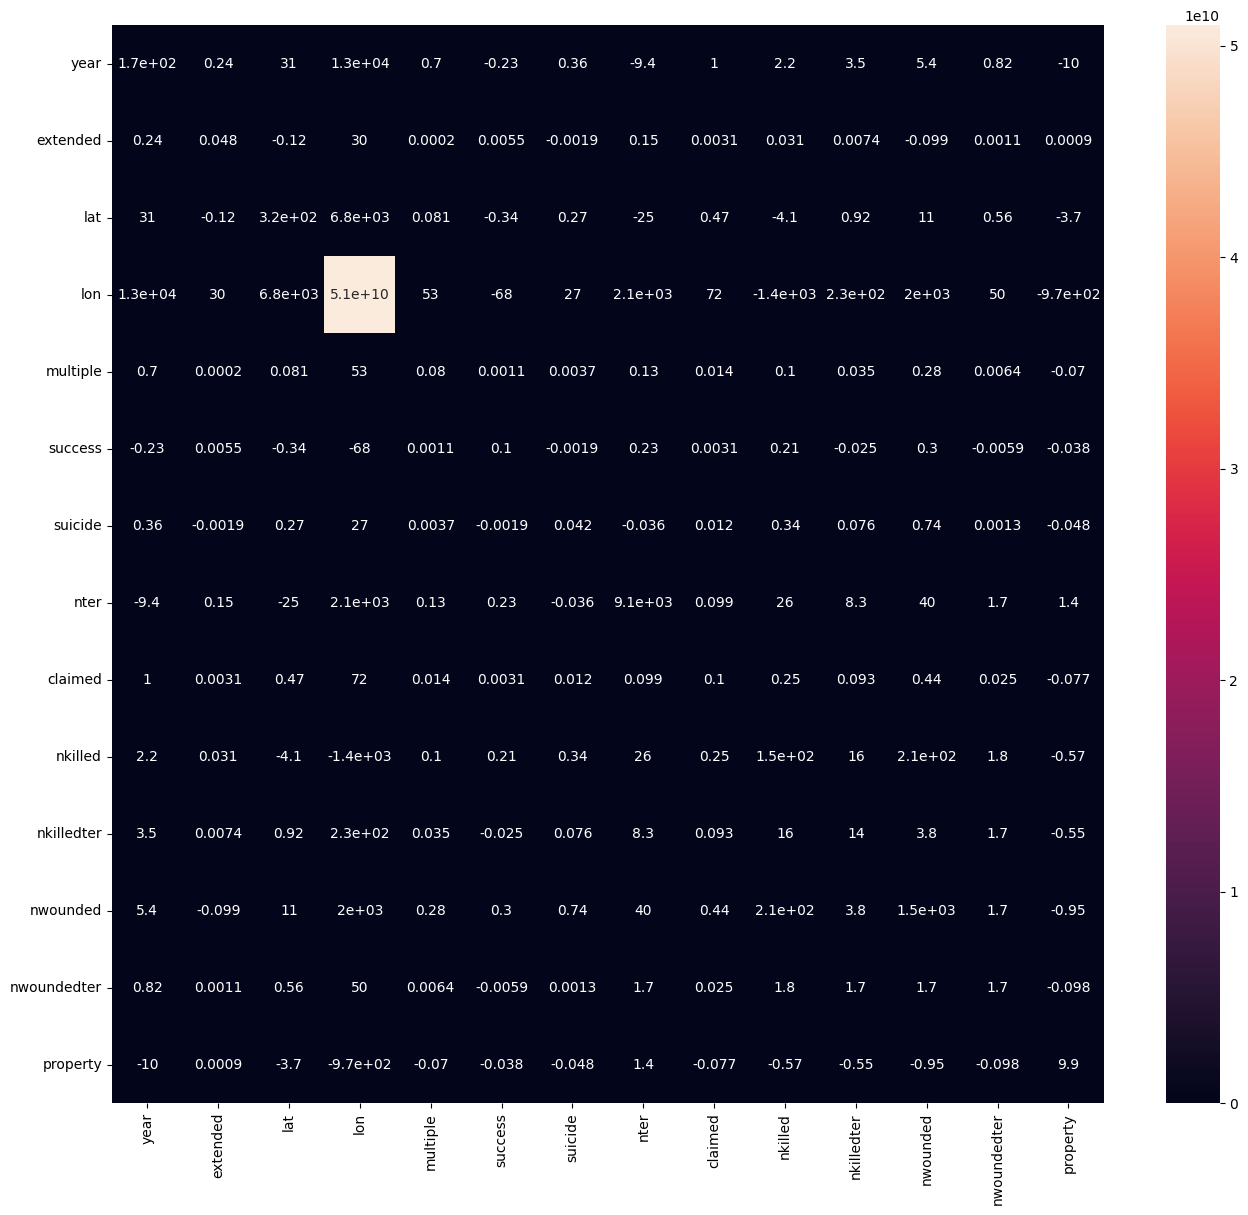

In [93]:
# Heat map of the covariance among the set of variables
fig,axes = plt.subplots(1,1,figsize=(16,14))
sns.heatmap(df_terrorism.cov(), annot = True)
plt.show()

<Axes: >

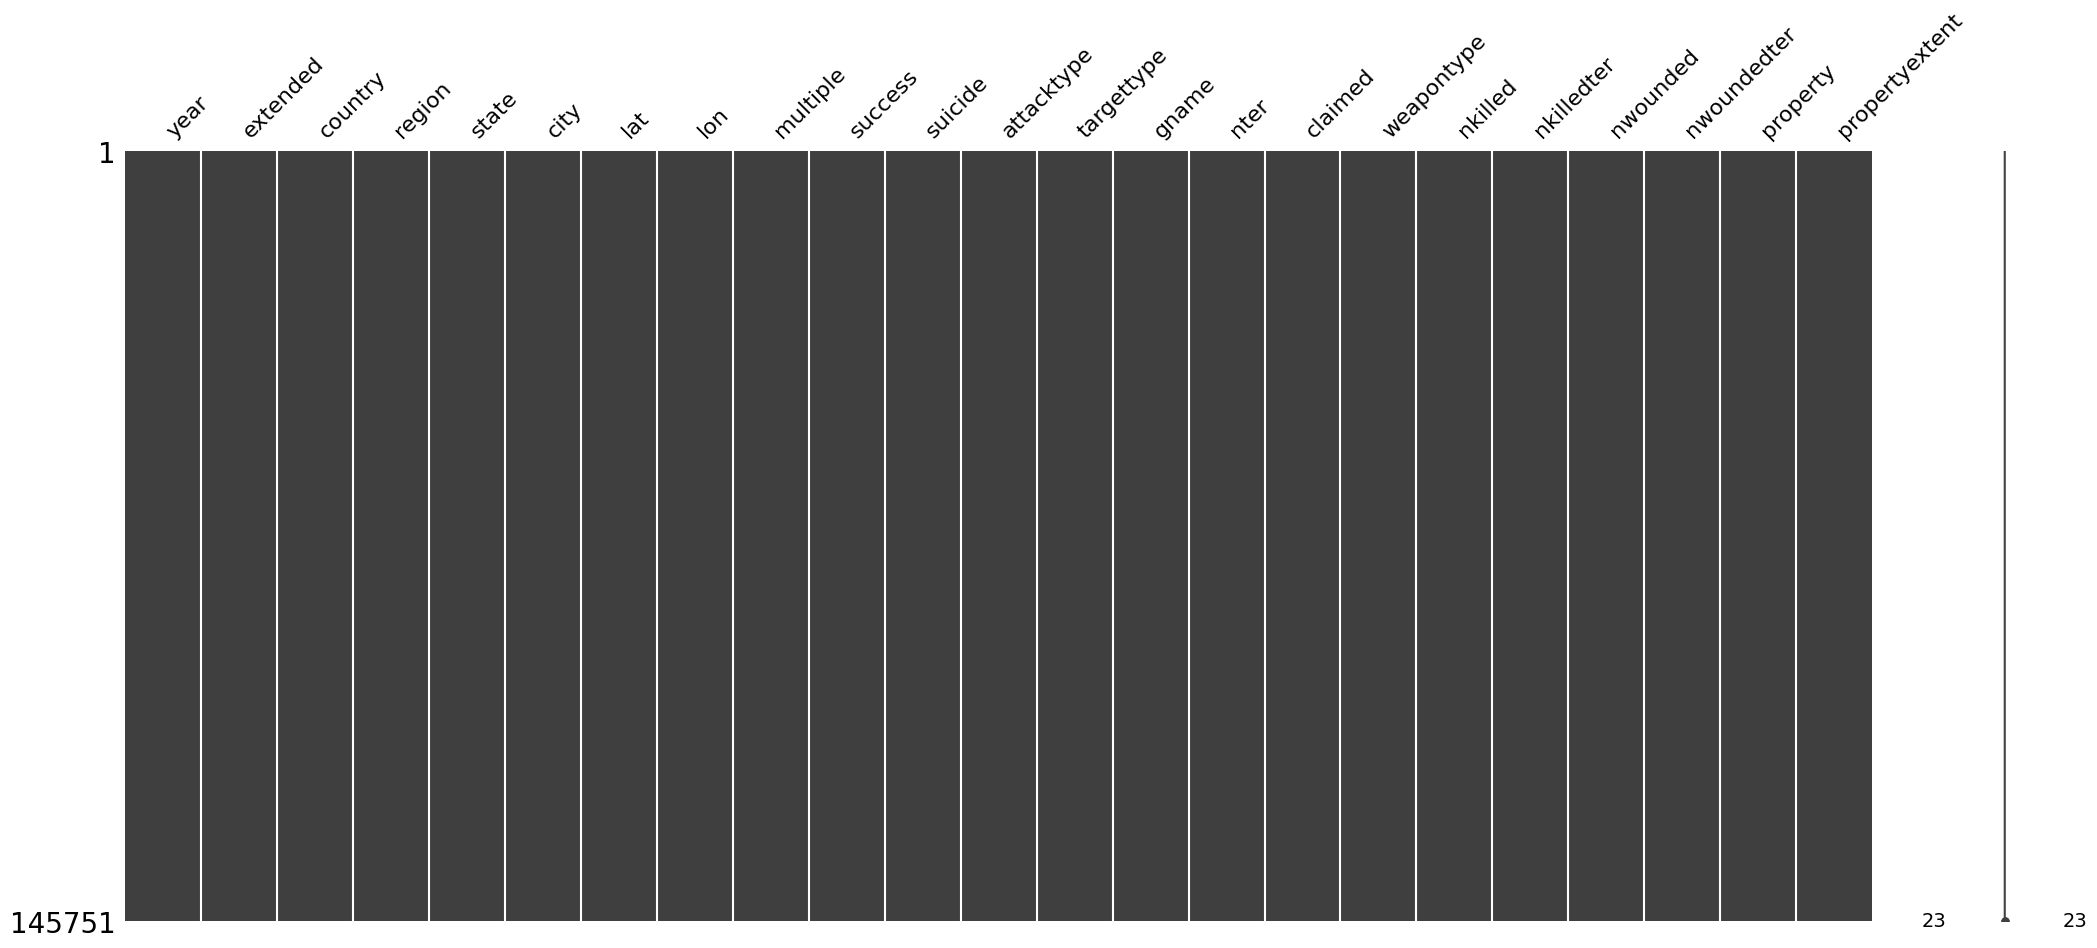

In [143]:
# Visualization of missing values
# df_terrorism.fillna(0, inplace=True)

# sns.heatmap(df_terrorism.isnull(), yticklabels=False, cbar=False, cmap='viridis')
msno.matrix(df_terrorism)
# msno.heatmap(df_terrorism, cmap='YlGnBu')
# msno.bar(df_terrorism)
# sns.heatmap(df_terrorism.isnull(), yticklabels = False, cbar = False, cmap = "viridis")

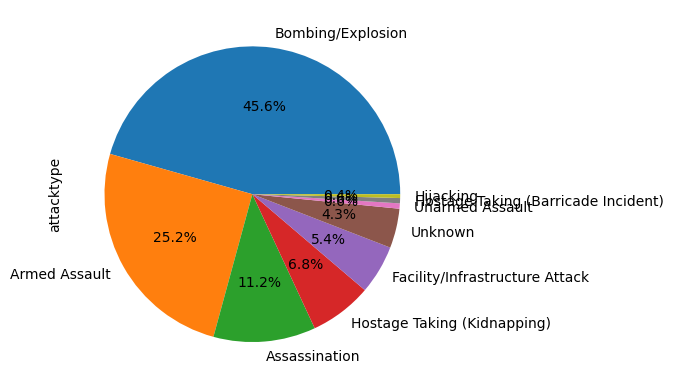

In [95]:
# Pie Plot of AttackTypes
df_terrorism['attacktype'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

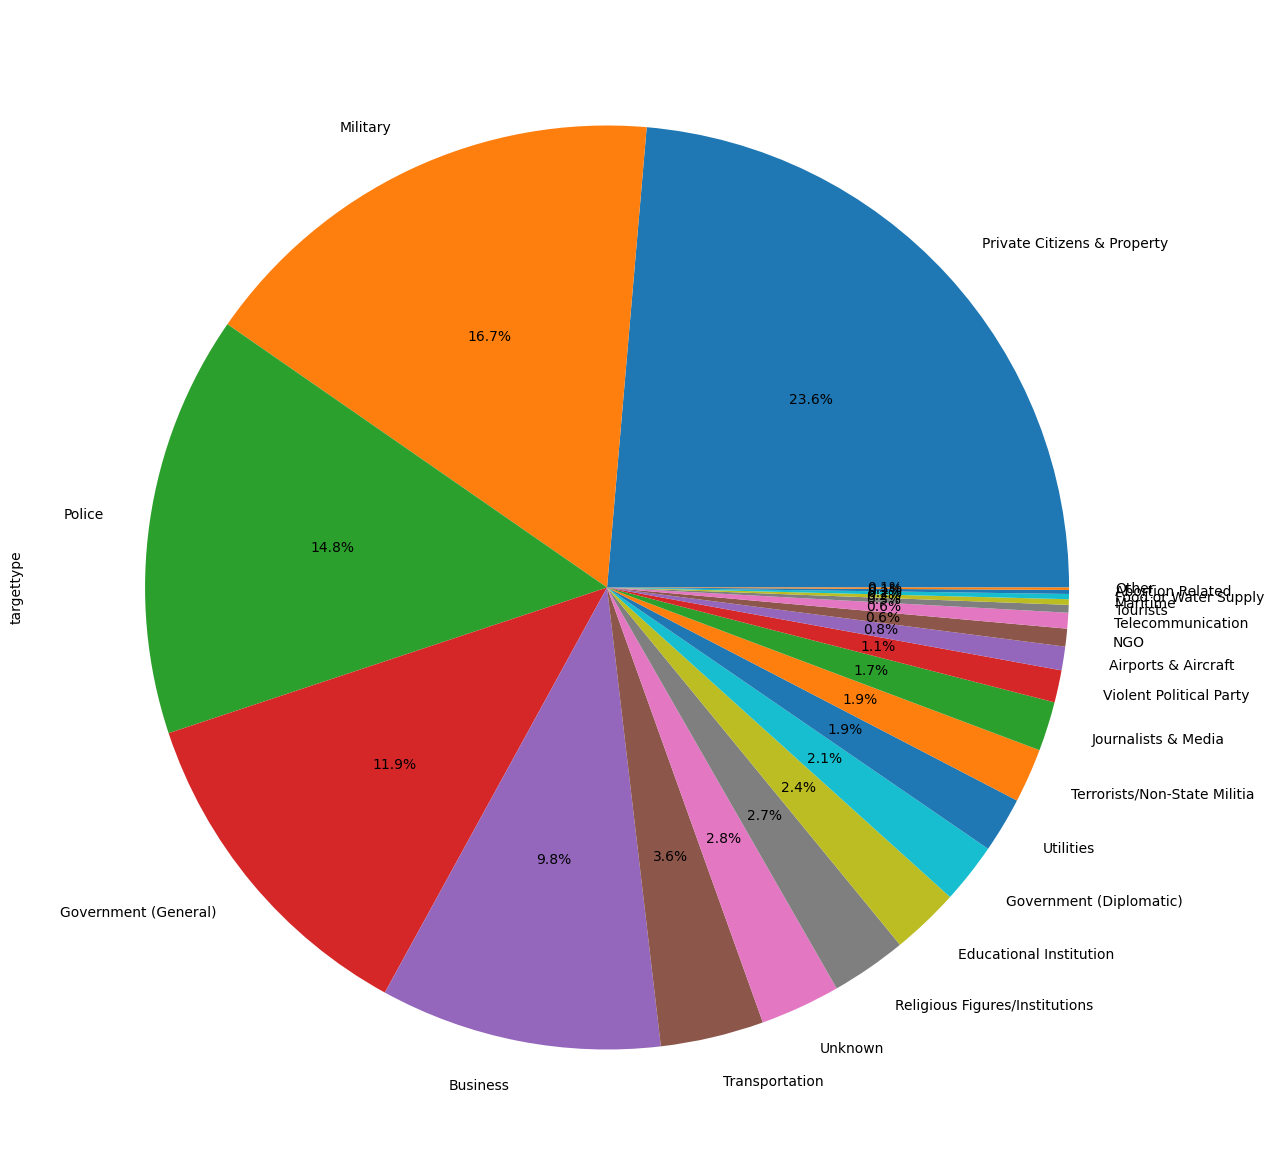

In [96]:
# Pie Plot of TargetTypes
plt.figure(figsize=(15,15))
df_terrorism['targettype'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

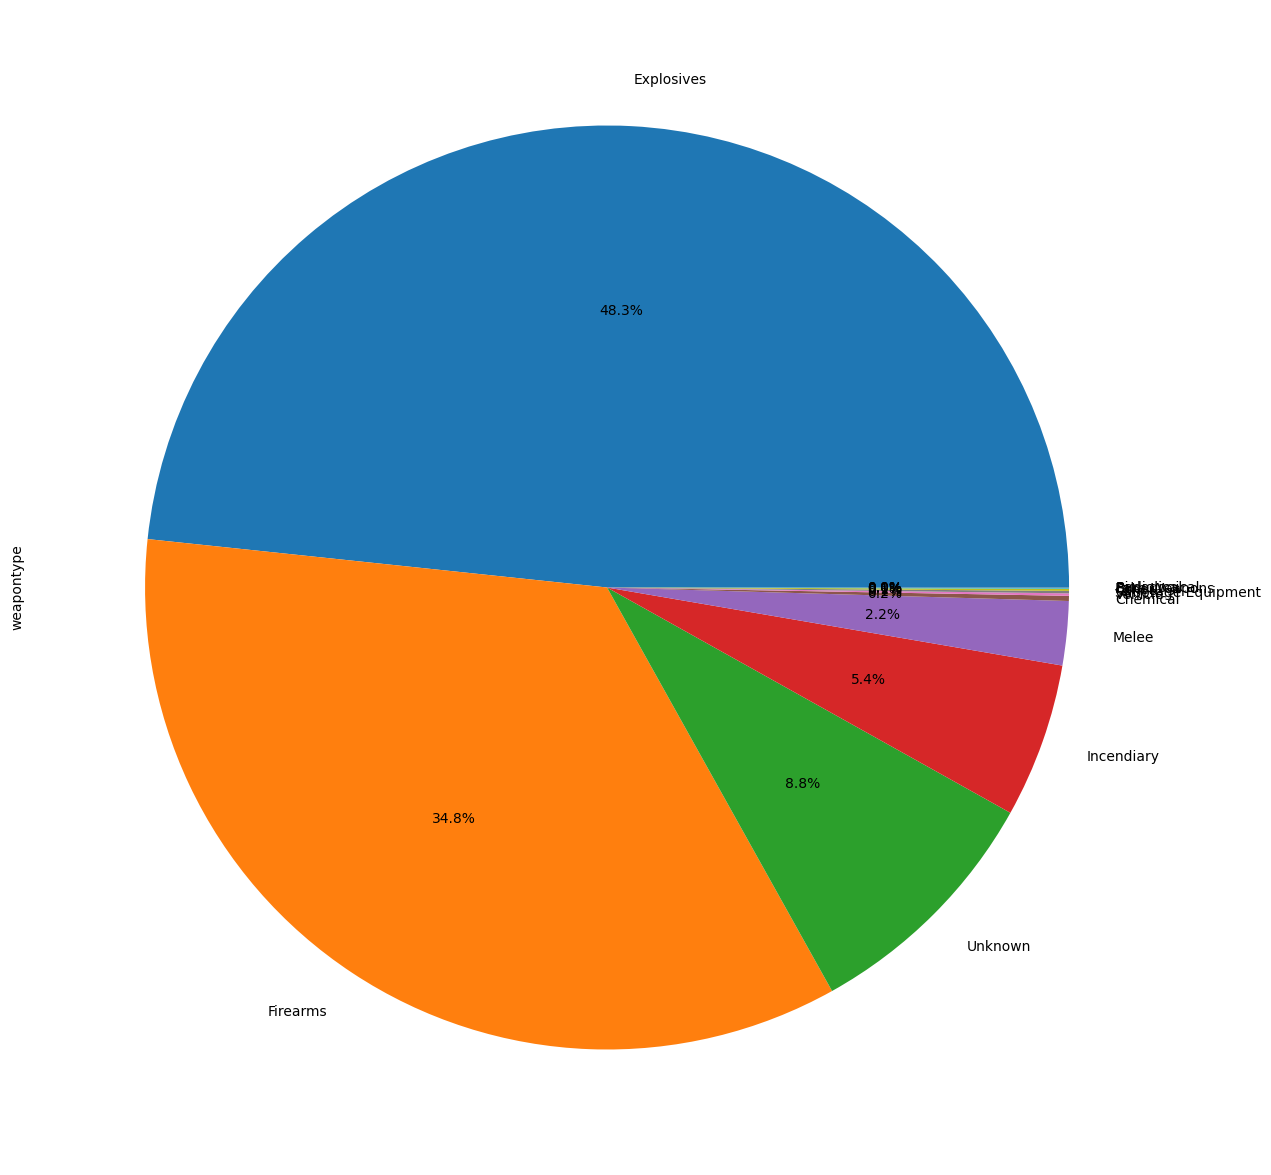

In [97]:
# Pie Plot of WeaponTypes
plt.figure(figsize=(15,15))
df_terrorism['weapontype'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

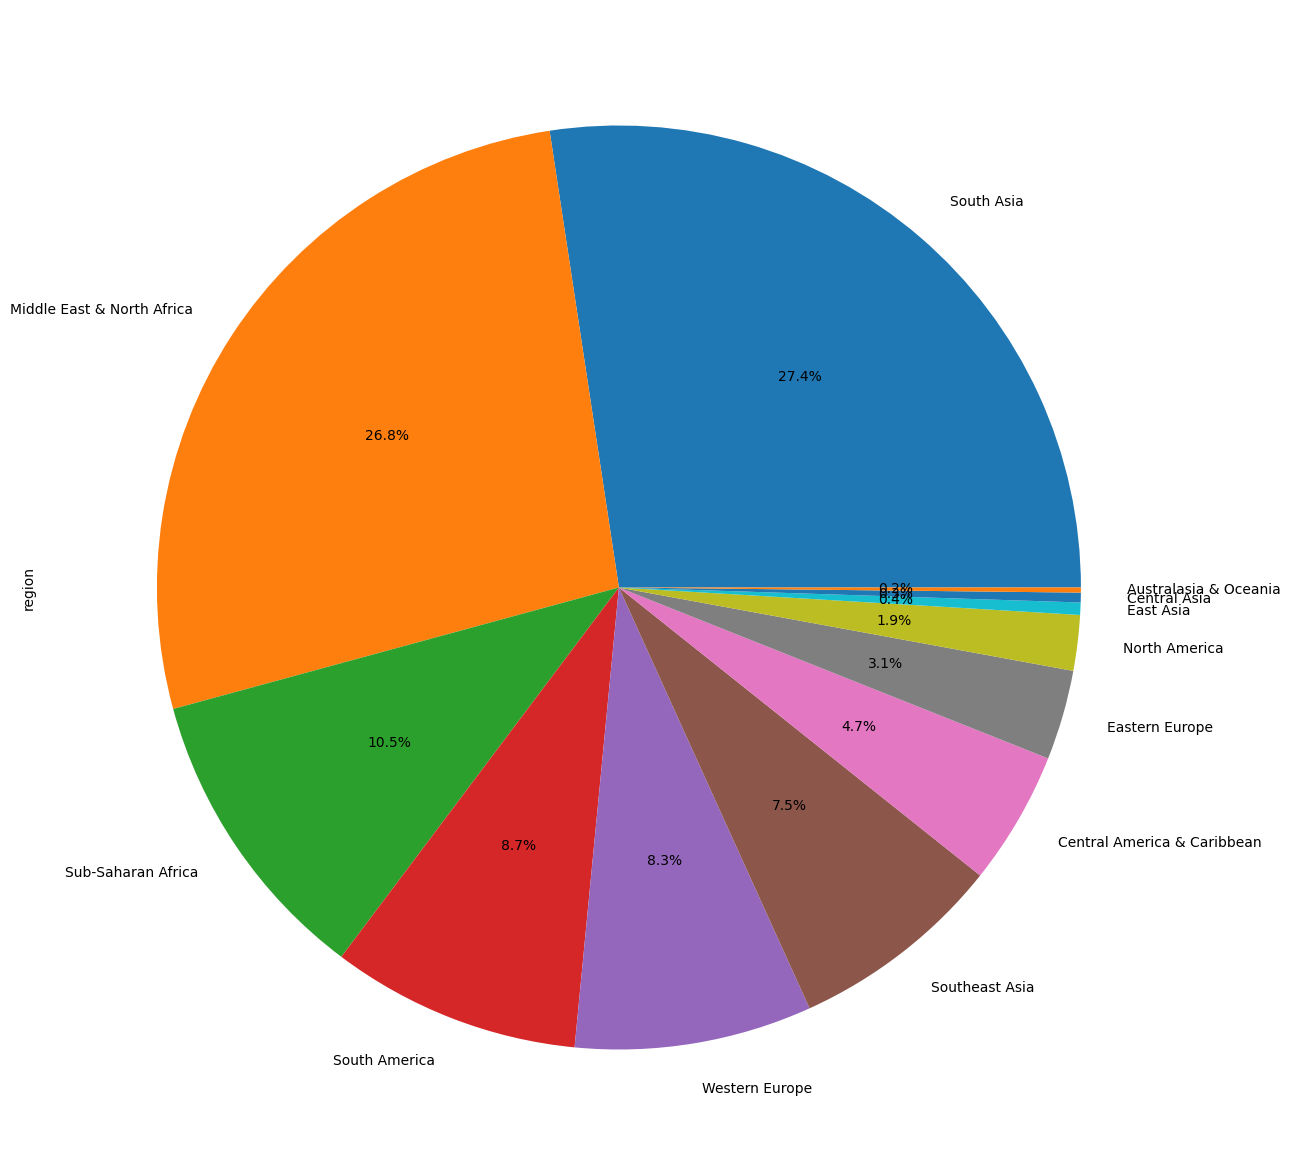

In [98]:
# Pie Plot of Region
plt.figure(figsize=(15,15))
df_terrorism['region'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

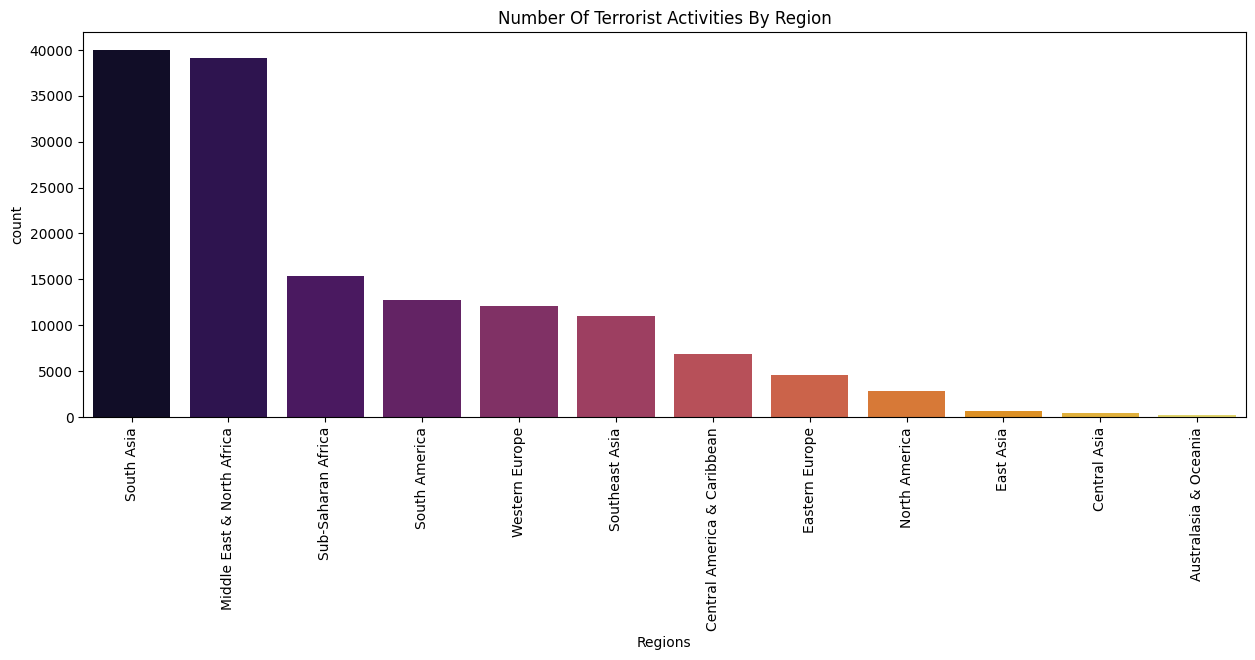

In [112]:
# Number of Terrorist Activities by Region
plt.subplots(figsize=(15,5))
sns.countplot(x ='region',data=df_terrorism,palette='inferno',order=df_terrorism['region'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Regions')
plt.title('Number Of Terrorist Activities By Region')
plt.show()

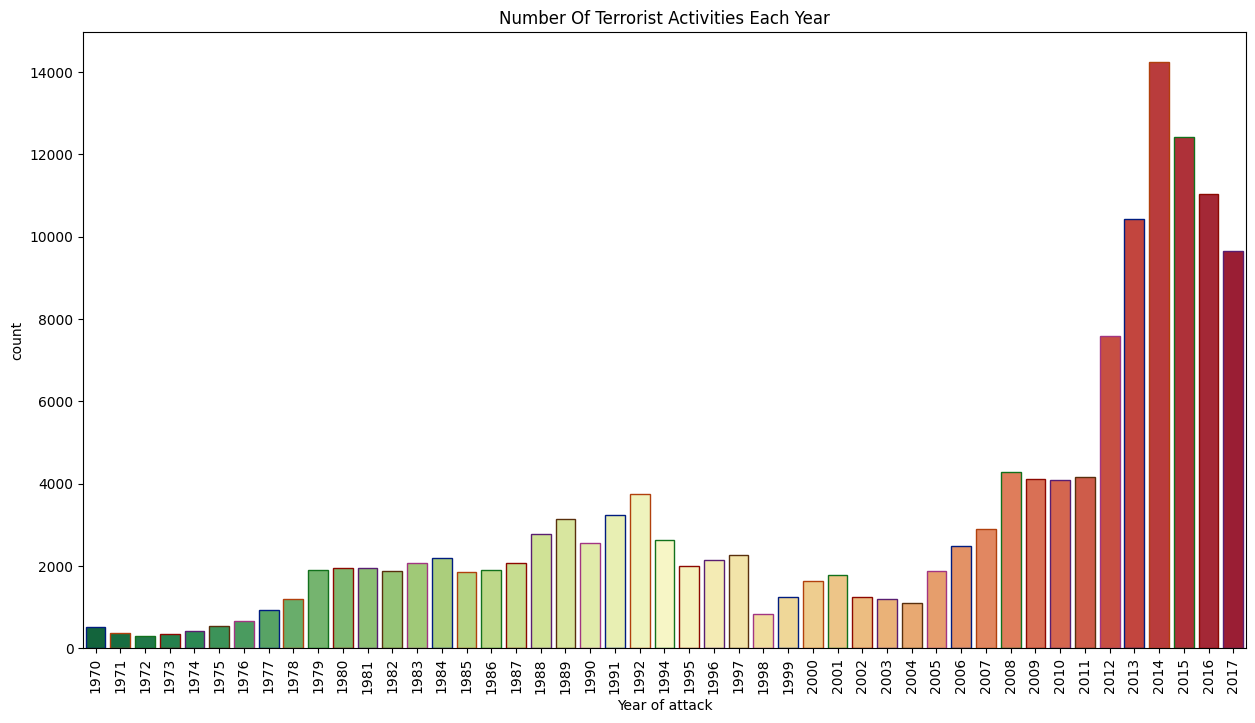

In [116]:
# Number of Terrorist Activities Each Year
plt.subplots(figsize=(15,8))
sns.countplot(x = 'year',data=df_terrorism,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.xlabel('Year of attack')
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

Text(0, 0.5, 'Frequency of Attacks')

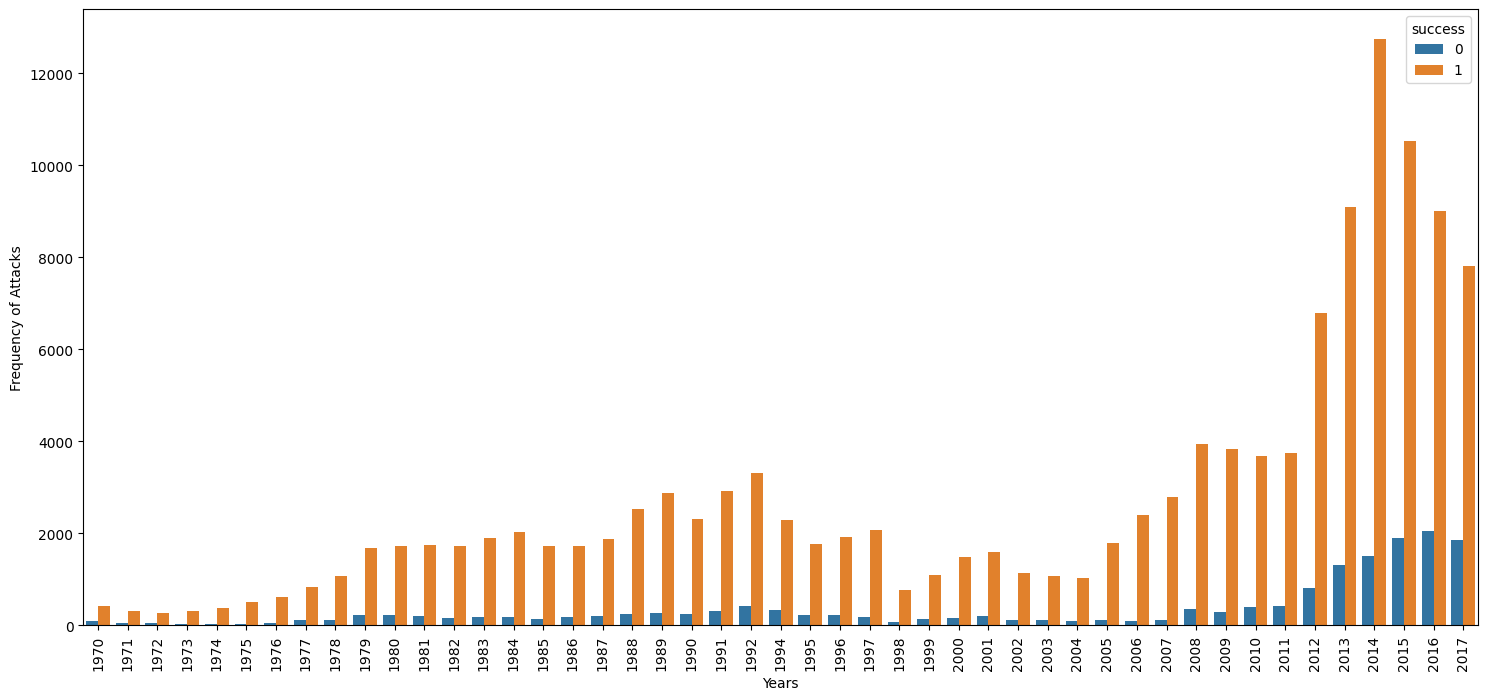

In [117]:
# Frequency of Attacks
plt.figure(figsize=(18,8))
sns.countplot(x=df_terrorism["year"], hue="success", data = df_terrorism)
plt.xlabel("Years")
plt.xticks(rotation=90)
plt.ylabel("Frequency of Attacks")

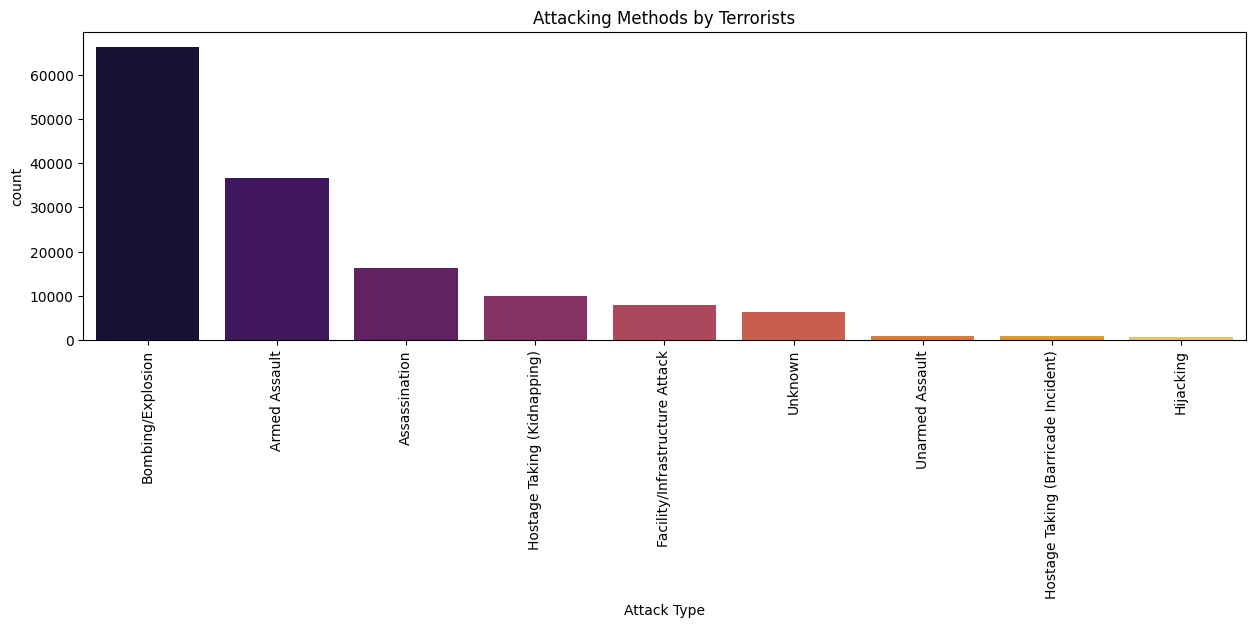

In [119]:
# Attacking Methods of Terrorists
plt.subplots(figsize=(15,4))
sns.countplot(x = 'attacktype',data=df_terrorism,palette='inferno',order=df_terrorism['attacktype'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Attack Type')
plt.title('Attacking Methods by Terrorists')
plt.show()

Text(0.5, 1.0, 'Types of Weapons')

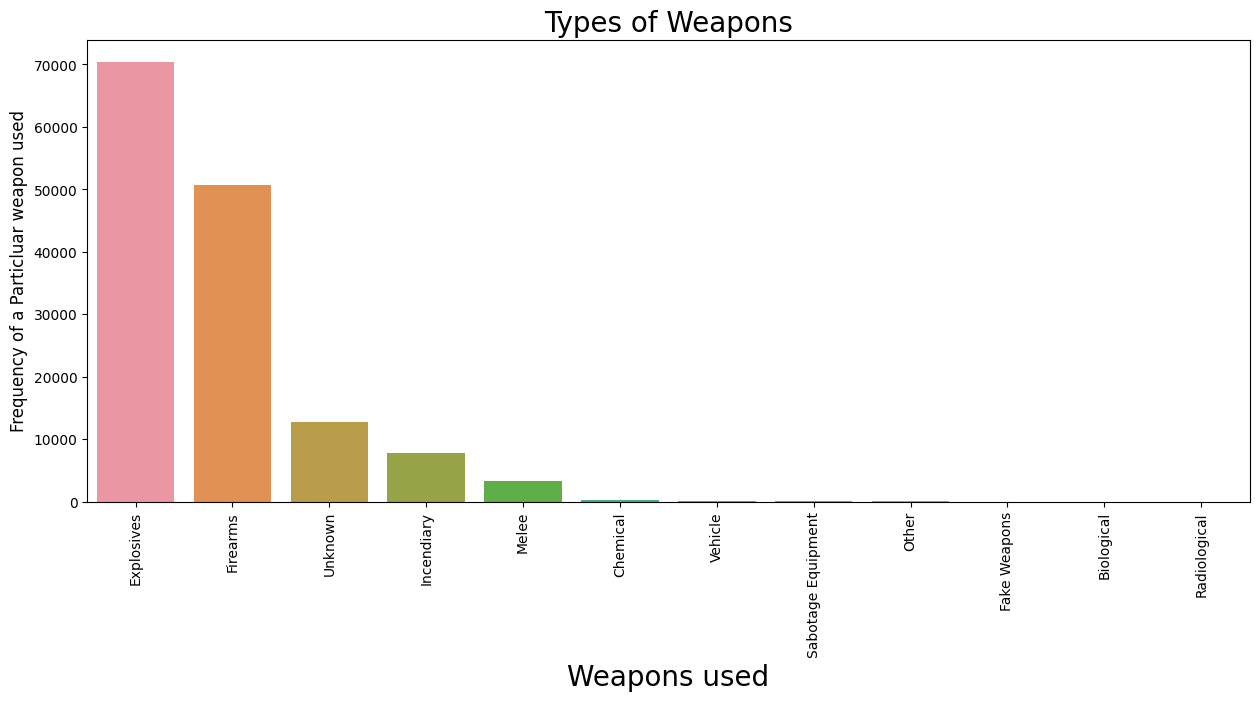

In [120]:
# Frequency of each weapon used
plt.figure(figsize=(15,6))
sns.barplot(x= df_terrorism["weapontype"].value_counts()[:50].index,y = df_terrorism["weapontype"].value_counts()[:50].values)
plt.xlabel("Weapons used", fontsize=20)
plt.xticks(rotation=90)
plt.ylabel("Frequency of a Particluar weapon used", fontsize=12)
plt.title("Types of Weapons", fontsize=20)

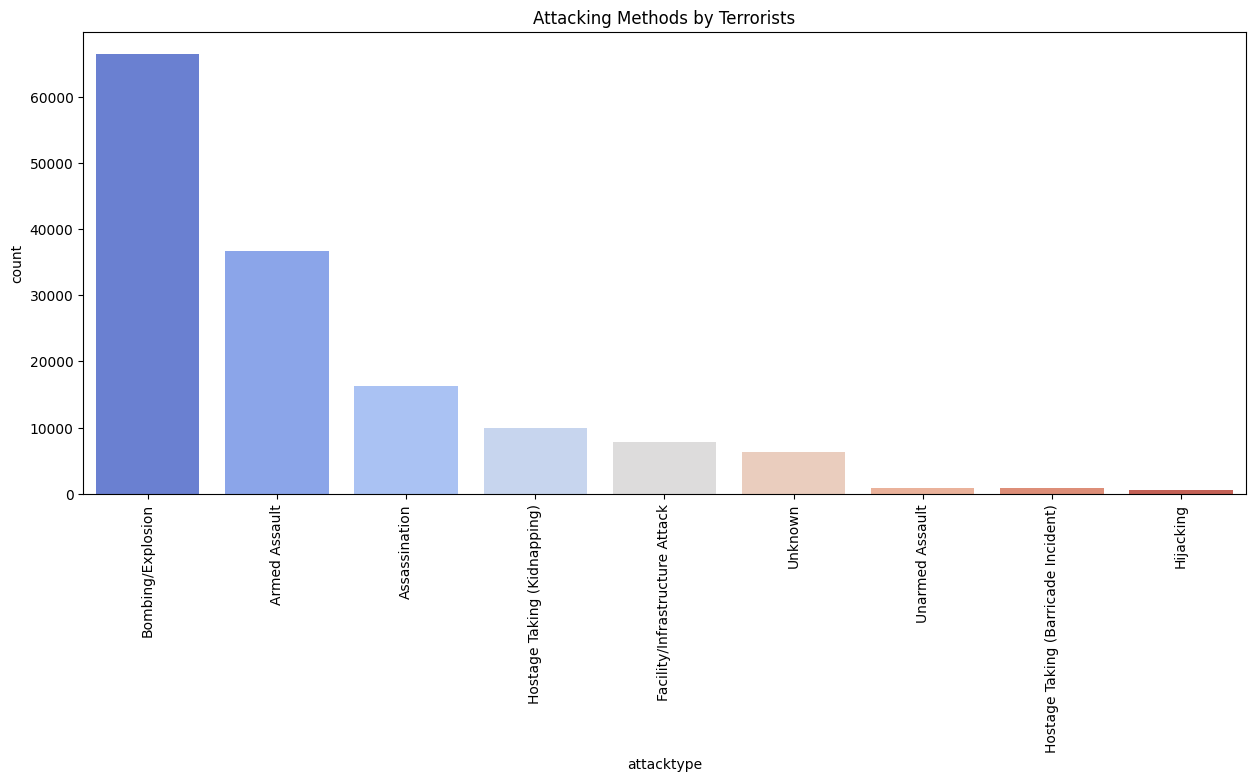

In [121]:
#Attacking Methods by the Terrorists
plt.subplots(figsize=(15,6))
sns.countplot(x= 'attacktype', data=df_terrorism, palette='coolwarm',order=df_terrorism['attacktype'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

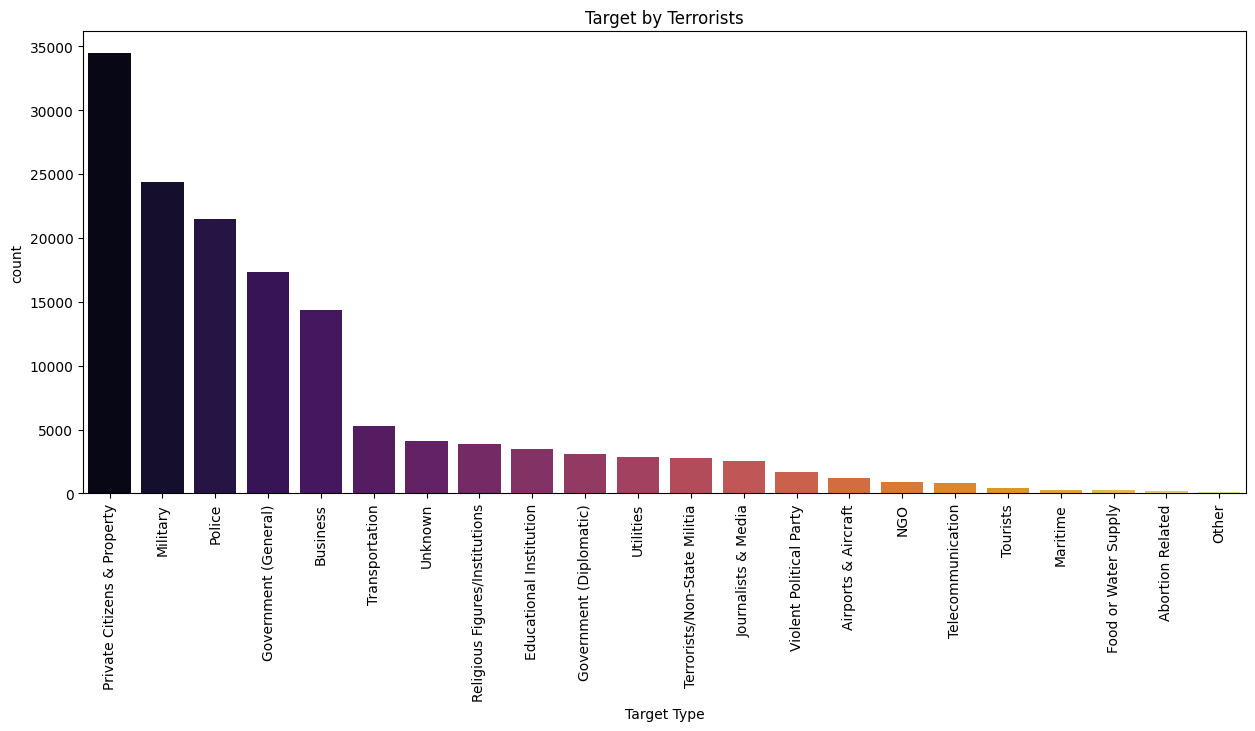

In [123]:
# Different Target places for Terrorists to Attack
plt.subplots(figsize=(15,6))
sns.countplot(x = 'targettype',data=df_terrorism,palette='inferno',order=df_terrorism['targettype'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Target Type')
plt.title('Target by Terrorists')
plt.show()

Text(0.5, 1.0, 'Number of Terrorist Activities Countrywise')

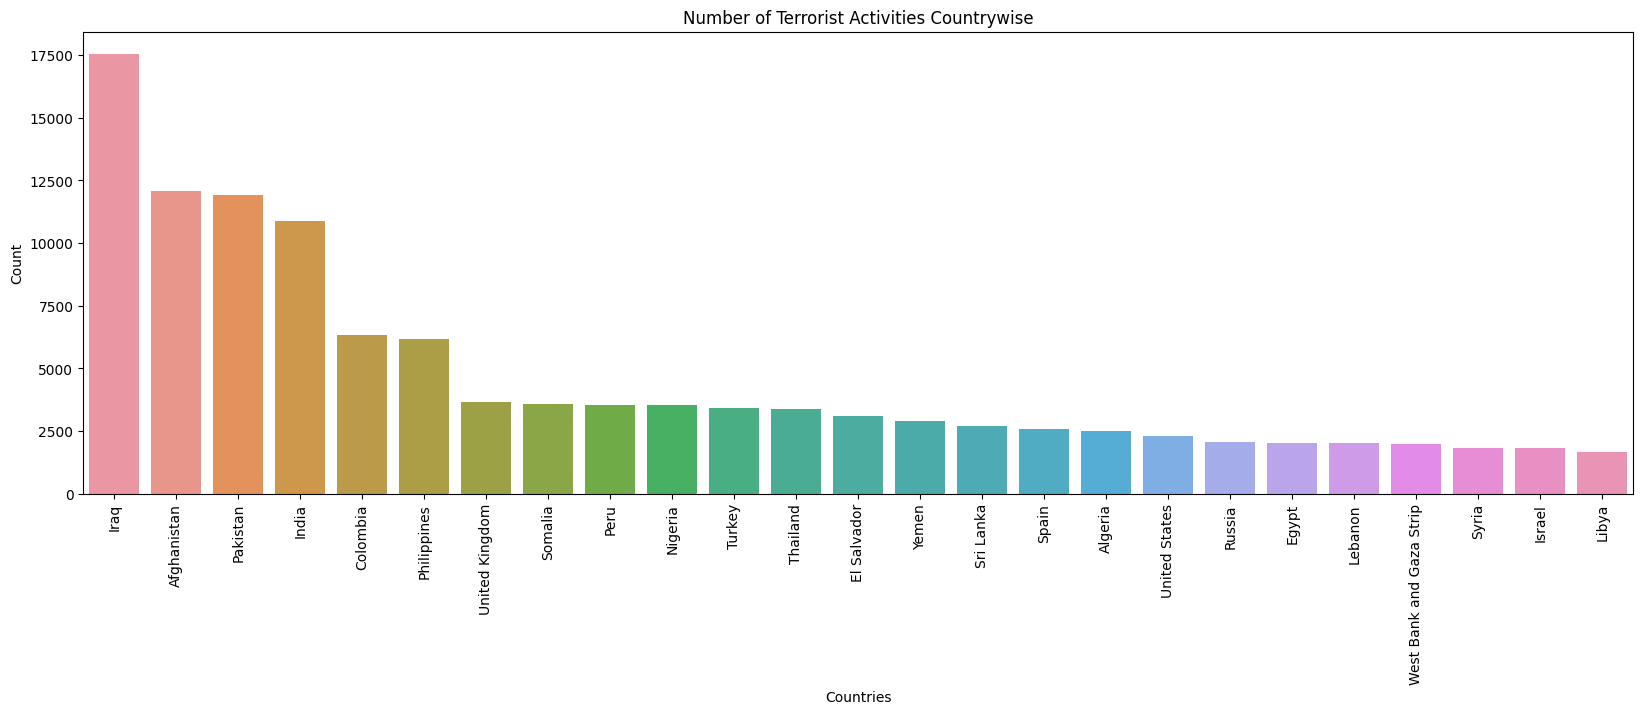

In [124]:
# Number of Terrorist Activities Countrywise
plt.figure(figsize=(20,6))
sns.barplot(x=df_terrorism['country'].value_counts()[:25].index, y=df_terrorism['country'].value_counts()[:25])
plt.xlabel("Countries")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [10,8]
plt.title("Number of Terrorist Activities Countrywise")

Text(0.5, 1.0, 'Number of Terrorist Activities Regionwise')

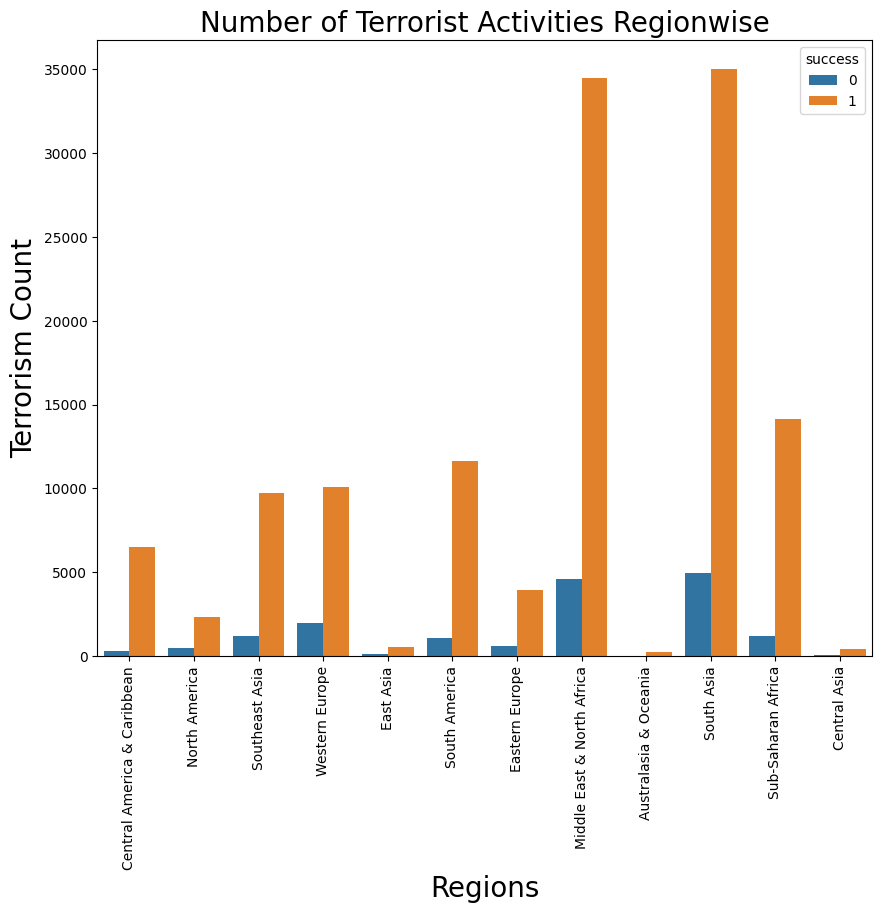

In [125]:
# Number of Terrorist Activities Regionwise
sns.countplot(x= df_terrorism["region"], hue="success", data=df_terrorism)
plt.xlabel("Regions", fontsize=20)
plt.xticks(rotation=90)
plt.ylabel("Terrorism Count", fontsize=20)
plt.title("Number of Terrorist Activities Regionwise", fontsize=20)

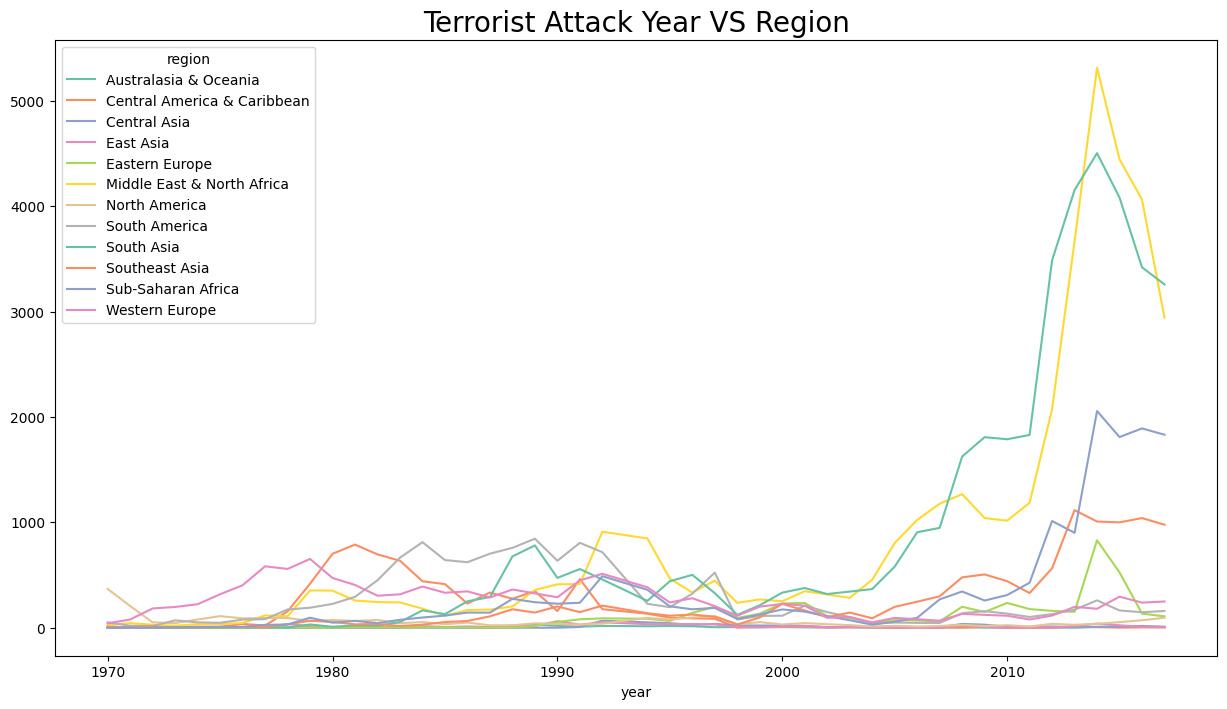

In [126]:
# Terrorist Attack Year VS Region
df_region=pd.crosstab(df_terrorism.year,df_terrorism.region)
df_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
plt.title("Terrorist Attack Year VS Region", fontsize=20)
fig.set_size_inches(15,8)
plt.show()

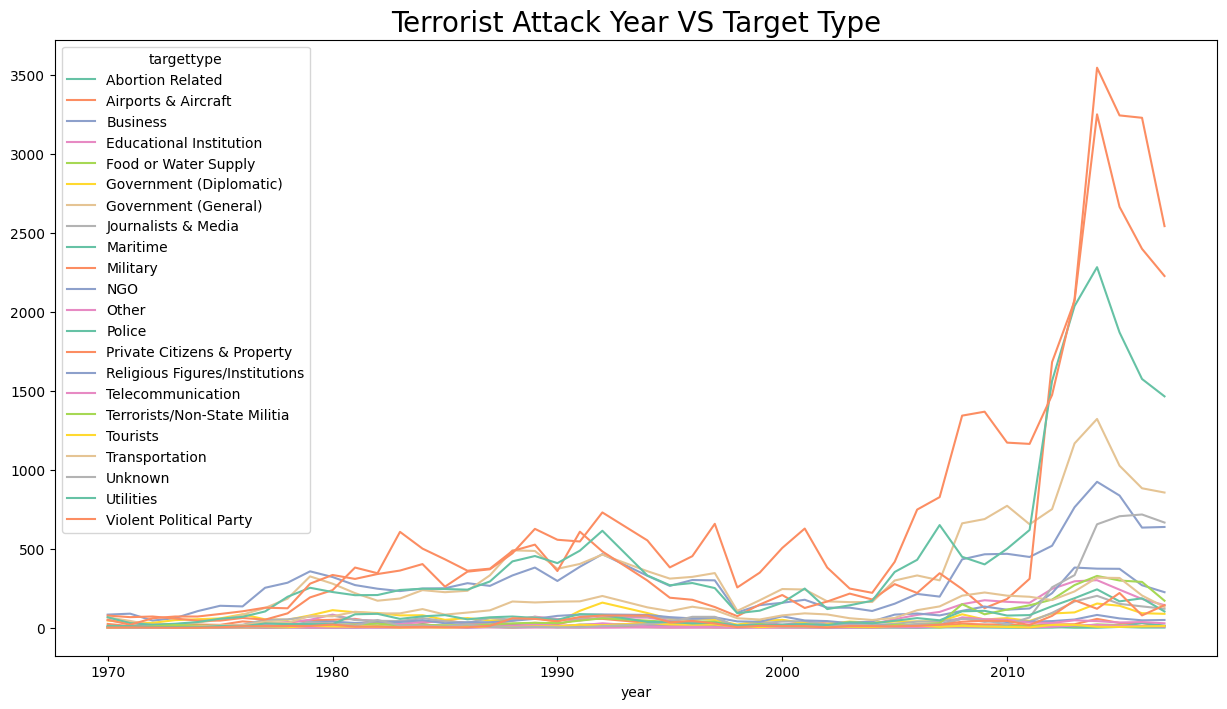

In [127]:
# Terrorist Attack Year VS Target Type
df_region=pd.crosstab(df_terrorism.year,df_terrorism.targettype)
df_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
plt.title("Terrorist Attack Year VS Target Type", fontsize=20)
fig.set_size_inches(15,8)
plt.show()

Text(0, 0.5, 'Wounded')

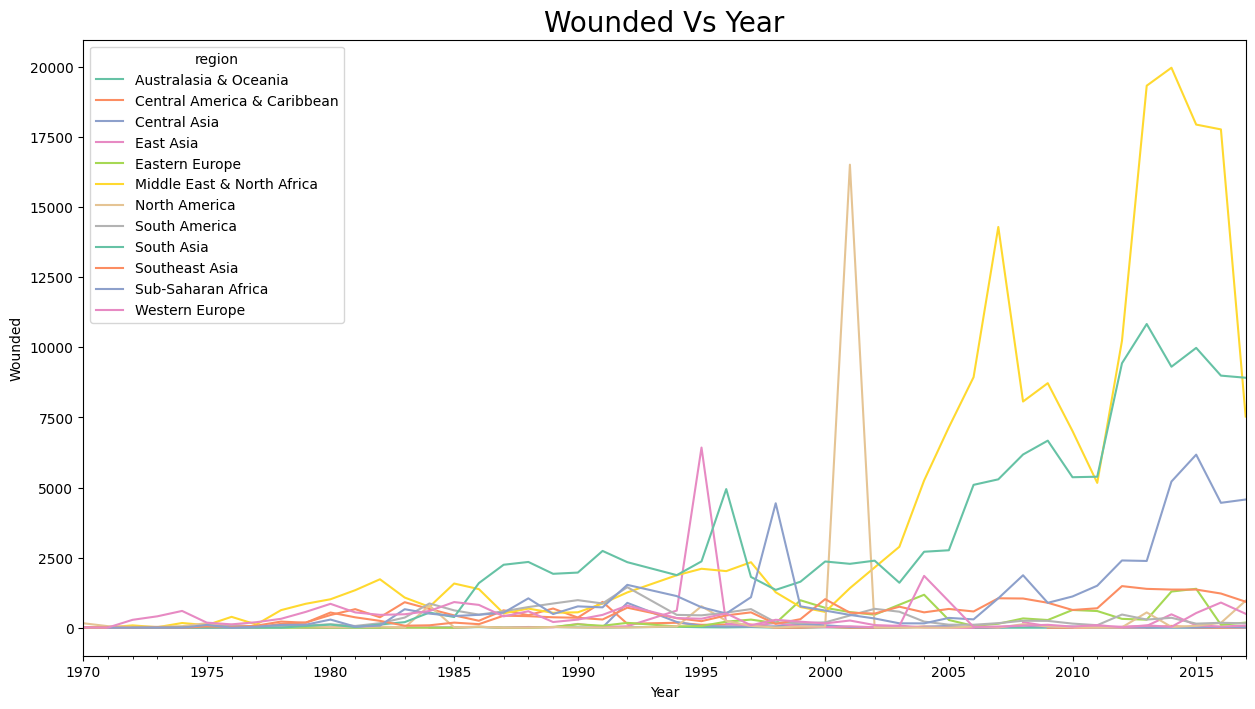

In [128]:
# Wounded VS Year
d=df_terrorism.groupby(['year','region'])['nwounded'].sum()
plot_df_terrorism = d.unstack('region').loc[:]
plot_df_terrorism.index = pd.PeriodIndex(plot_df_terrorism.index.tolist(),freq='A')
plot_df_terrorism.plot(figsize=(15,8),color=sns.color_palette('Set2',12))
plt.title("Wounded Vs Year", fontsize=20)
plt.xlabel("Year")
plt.ylabel("Wounded")

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'extended'}>,
        <Axes: title={'center': 'lat'}>, <Axes: title={'center': 'lon'}>],
       [<Axes: title={'center': 'multiple'}>,
        <Axes: title={'center': 'success'}>,
        <Axes: title={'center': 'suicide'}>,
        <Axes: title={'center': 'nter'}>],
       [<Axes: title={'center': 'claimed'}>,
        <Axes: title={'center': 'nkilled'}>,
        <Axes: title={'center': 'nkilledter'}>,
        <Axes: title={'center': 'nwounded'}>],
       [<Axes: title={'center': 'nwoundedter'}>,
        <Axes: title={'center': 'property'}>, <Axes: >, <Axes: >]],
      dtype=object)

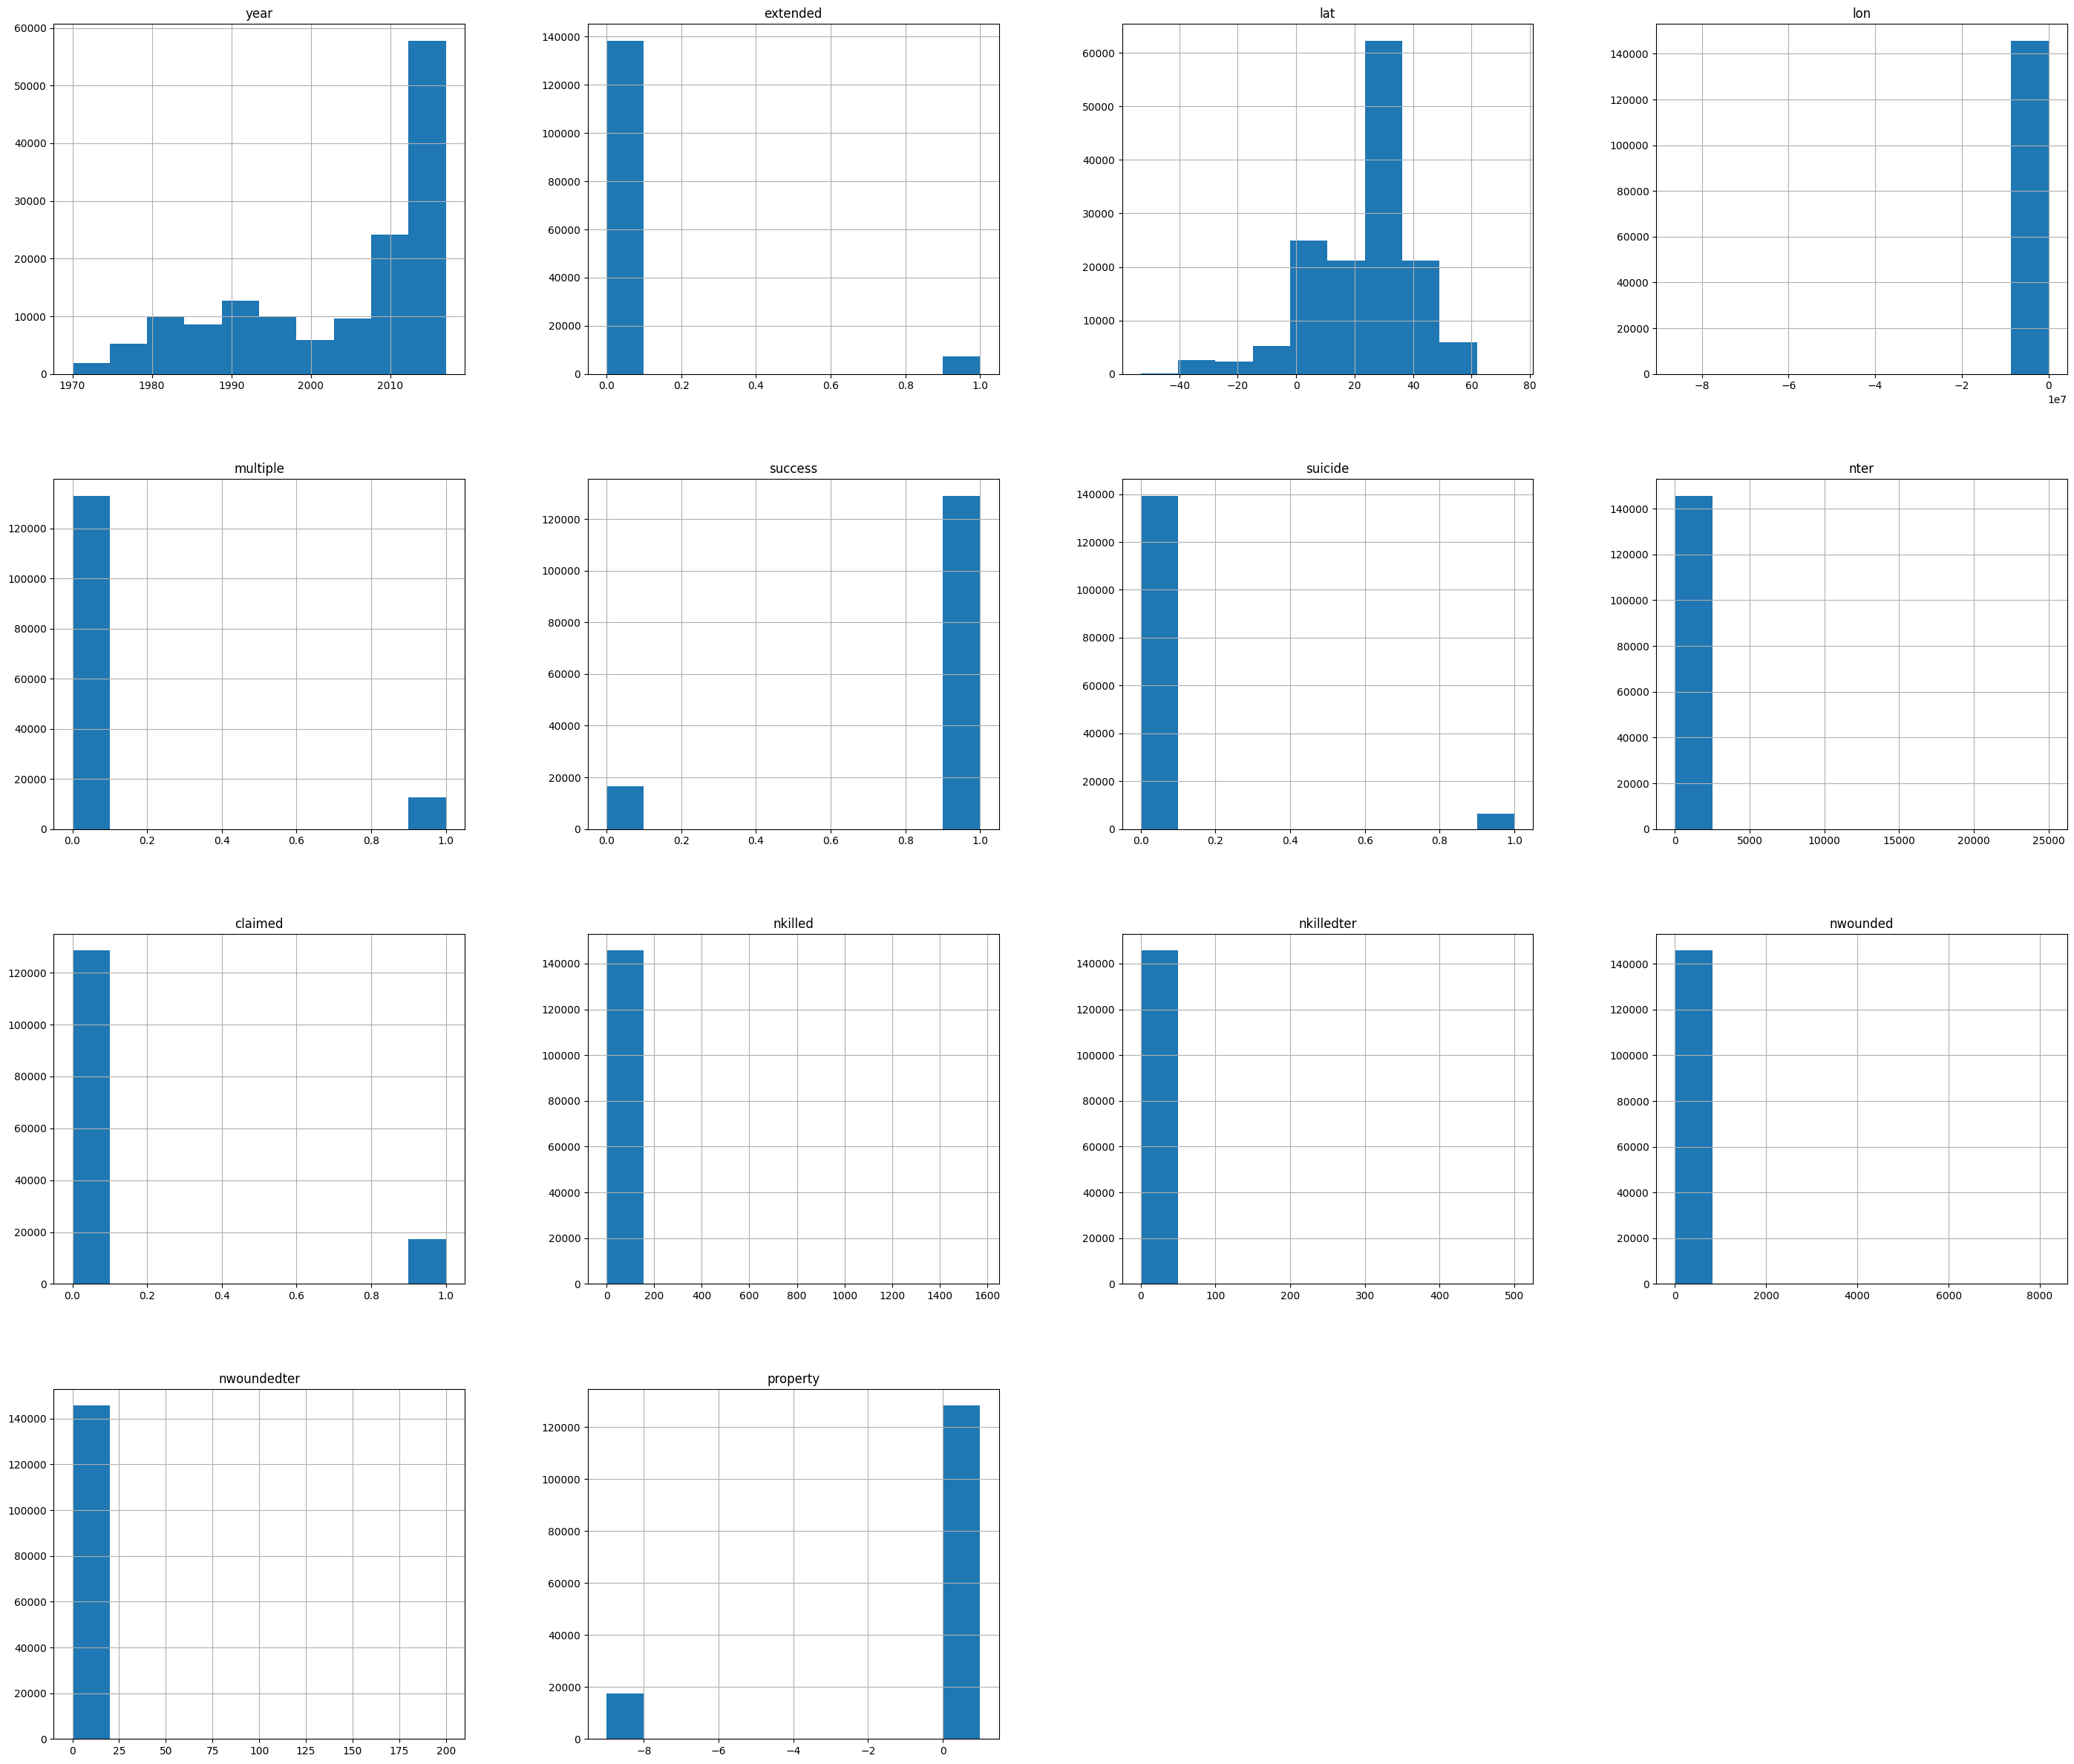

In [129]:
# Histogram of the Data
df_terrorism.hist(figsize=(35,30))

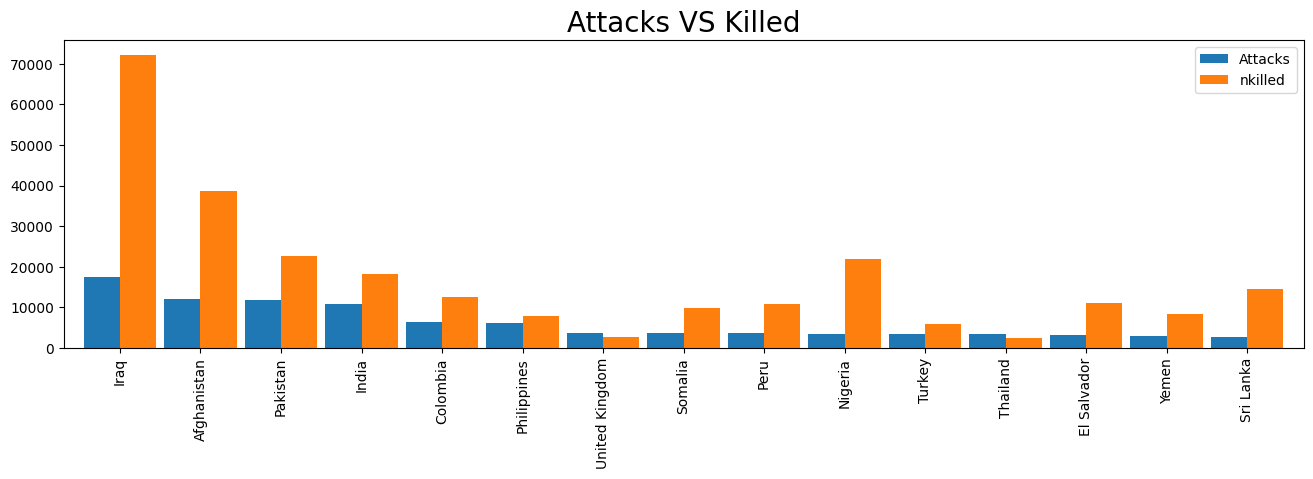

In [130]:
# Attacks VS Killed
count_terror = df_terrorism['country'].value_counts()[:15].to_frame()
count_terror.columns=['Attacks']
count_kill=df_terrorism.groupby ('country')['nkilled'].sum().to_frame()
count_terror.merge(count_kill,left_index = True,right_index =True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
plt.title("Attacks VS Killed", fontsize=20)
fig.set_size_inches(16,4)
plt.show()

# Conclusion
**• Country with the highest number of Terrorist Attacks: Iraq <br>
• Regions with the highest number of Terrorist Attacks: Middle East & North Africa <br>
• Maximum number of people were killed by a single terrorist attack are 1570 people that took place in Iraq <br>
• Year with the most Attacks: 2014 <br>
• Month with the most Attacks: 5 <br>
• Group with the most Attacks: Taliban <br>
• Most Attacks Types: Bombing/Explosion**

